# Kaggle 신용카드 부정결제 검출 (Google Drive Mount)
https://www.kaggle.com/mlg-ulb/creditcardfraud
## Credit Card Fraud Detection
* creditcard.csv (284,807 * 31)
* Class : '0' (정상결제), '1' (부정결제)
* 부정 검출(Fraud Detection), 이상 탐지(Anomaly Detection)

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. Google Drive Mount
* 'creditCardFraud.zip' 파일을 구글드라이브에 업로드 후 진행

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


* 마운트 결과 확인

In [3]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'

-rw------- 1 root root 69155672 Mar 31 15:04 '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'


# II. Data Preprocessing

> ## 1) Unzip 'creditCardFraud.zip'

* Colab 파일시스템에 'creditcard.csv' 파일 생성

In [4]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/creditCardFraud.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip
  inflating: creditcard.csv          


* creditcard.csv 파일 확인

In [7]:
!ls -l

total 147304
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
drwx------ 5 root root      4096 Sep 23 07:00 drive
drwxr-xr-x 1 root root      4096 Sep 16 13:40 sample_data


> ## 2) 데이터 읽어오기

* pandas DataFrame

In [8]:
%%time

import pandas as pd

DF = pd.read_csv('creditcard.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* '0' (정상) Class와 '1' (부정) Class 개수

In [10]:
DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

* '0' (정상) Class와 '1' (부정) Class 비율

In [11]:
(DF.Class.value_counts() / DF.shape[0]) * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

> ## 3) Time 열(Column) 삭제

In [12]:
DF.drop('Time', axis = 1, inplace = True)

DF.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.5516,-0.617801,-0.99139,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


> ## 4) train_test_split

* X (Input), y (Output) 지정

In [13]:
X = DF.iloc[:,:-1]
y = DF.iloc[:, -1]

X.shape, y.shape

((284807, 29), (284807,))

> ### (1) Without 'stratify'

In [14]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

* Train_Data와 Test_Data의 1 (부정) 비율이 불균형

In [15]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    99.825445
1     0.174555
Name: Class, dtype: float64
Test_Data : 
 0    99.831467
1     0.168533
Name: Class, dtype: float64


> ### (2) With 'Stratify'

In [16]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

* Train_Data와 Test_Data의 1 (부정) 비율이 균형

In [17]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    99.827451
1     0.172549
Name: Class, dtype: float64
Test_Data : 
 0    99.826785
1     0.173215
Name: Class, dtype: float64


# III. Modeling

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, KFold
from datetime import datetime

In [19]:
DF.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-3.517076e-16,1.425729e-16,1.109525e-15,-3.138234e-16,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-2.477917e-16,3.567582e-16,2.811474e-16,2.717167e-16,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,2.893672e-16,1.149692e-15,-1.116789e-16,-2.874017e-16,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,4.682341e-16,-2.445230e-15,-2.650351e-16,2.343317e-16,-1.588105e-15,-3.251906e-16,6.535992e-16,1.203843e-16,1.120752e-16,-4.340941e-16,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733
V10,7.433820e-17,-4.782388e-16,6.289267e-16,6.055490e-16,-6.601716e-16,2.850776e-16,3.043333e-17,9.051847e-17,-2.771761e-16,1.000000e+00,2.624448e-16,1.439907e-15,-8.853582e-16,2.622513e-16,7.615272e-16,-1.705923e-15,3.674182e-15,3.986710e-16,2.663038e-17,-1.141888e-15,8.089504e-16,-6.707598e-16

Class와의 상관계수가 0.18 이상인 변수들 <br>
V3 : -1.929608e-01 <br>
V7 : -1.872566e-01 <br>
V10 : -2.168829e-01	<br>
V12 : -2.605929e-01	<br>
V14 : -3.025437e-01	<br>
V16 : -1.965389e-01 <br>
V17 : -3.264811e-01 <br>
절대값이 높은 순 <br>
V17 > V14 > V12 > V10 > V16 > V3 > V7

In [22]:
Model_rf = RandomForestClassifier(n_estimators = 10,
                                  max_features = 5,
                                  random_state = 0,
                                  n_jobs = -1)
Model_rf.fit(X_train, y_train)
y_hat = Model_rf.predict(X_test)

In [23]:
print(confusion_matrix(y_test, y_hat))
print(accuracy_score(y_test, y_hat))
print(Model_rf.feature_importances_)

[[85292     7]
 [   35   109]]
0.9995084442259752
[0.01333599 0.00684791 0.0159749  0.04141698 0.01032508 0.01851305
 0.02941957 0.01768239 0.04176321 0.02924336 0.03730051 0.17184134
 0.00737977 0.11724406 0.01265934 0.02801617 0.22425021 0.04169703
 0.01256904 0.00874871 0.01838734 0.00843012 0.00814498 0.01466496
 0.00575165 0.02260754 0.01529188 0.00803025 0.01246264]


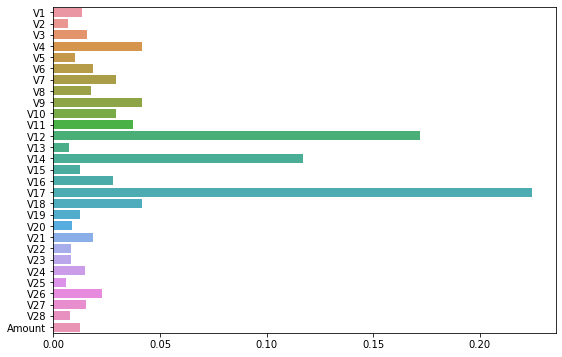

In [25]:
plt.figure(figsize = (9, 6))
sns.barplot(Model_rf.feature_importances_,
            DF.columns[:-1])
plt.show()

Feature Importances <br>
V17 > V12 > V14 > V4 ~= V9 ~= V18 > V11 > V10 ~= V7 <br>
 <br>
Correllation <br>
V17 > V14 > V12 > V10 > V16 > V3 > V7 <br>
 <br>
common factors <br>
V17, V14, V12 <br>
 <br>
--- <br>
 <br>
log_2(284807) ~= 18 -> max_depth의 기준치(18++, starting point)로 정함<br>
  18 21 25 30 40 55 ...
sqrt(29) ~= 5 -> max_feature의 기준치로 정함(5 전, 후)
  5 4 6 3 7 2 10 15 20

In [55]:
# Model_rf2 = RandomForestClassifier()
# params = {'n_estimators':[100],
#           'max_features':[4],
#           'max_depth':[25],
#           'random_state':[0]}
# 위 코드로 일단 숫자를 작게해서 1case만 돌려보고(cv 포함), 실행시간 측정을 한 후
# 몇 case를 돌릴지 정해보자
# 10 4 25 0 으로 45초
# 100 4 25 0 으로 555초(9분 15초) : 대충 tree 갯수에 비례한 시간...

# 시간상 이정도만 돌려보자...
# 예상시간 3*1*3*1*(45s) = 405초?
# 실제시간 454초 (7분 34초)
Model_rf2 = RandomForestClassifier()
params = {'n_estimators':[10, 20],
          'max_features':[5],
          'max_depth':[15, 20, 25],
          'random_state':[0]}


# 원래 돌려보려고 했던 코드
# Model_rf2 = RandomForestClassifier()
# params = {'n_estimators':[100, 200, 400],
#           'max_features':[4, 5, 6, 7],
#           'max_depth':[15, 20, 25, 30],
#           'random_state':[0]}


In [56]:
grid_cv = GridSearchCV(Model_rf2,
                       param_grid = params,
                       scoring = 'accuracy',
                       cv = KFold(n_splits = 3,
                                  random_state = 0),
                       refit = True,
                       n_jobs = -1)


In [57]:
%%time
grid_cv.fit(X_train, y_train)

CPU times: user 57.1 s, sys: 573 ms, total: 57.7 s
Wall time: 7min 34s


GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_scor

In [58]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.9994883726487993
{'max_depth': 15, 'max_features': 5, 'n_estimators': 20, 'random_state': 0}


max_depth = [15, 20, 25]에서 15일 때 가장 잘 나온 걸 보니, 더 키울 필욘 X
n_estimators = [10, 20] 에서 20일 때 가장 잘 나온 걸 보니, 좀 더 크게 돌려봐야
시간이 된다면 max_features case도 늘려봐야

In [59]:
Model_CV = grid_cv.best_estimator_
y_hat = Model_CV.predict(X_test)
print(confusion_matrix(y_test, y_hat))
print(accuracy_score(y_test, y_hat))

[[85295     4]
 [   34   110]]
0.9995552590615966


이제 positive <-> negative 위치를 바꾸고
recall을 구하면...

#
# 
# 
# The End
# 
# 
# 